In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df = pd.read_csv("liedetector.csv")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6
0,P_001,3.6216,8.6661,-2.8073,-0.44699,0
1,P_002,4.5459,8.1674,-2.4586,-1.46210,0
2,P_003,3.8660,-2.6383,1.9242,0.10645,0
3,P_004,3.4566,9.5228,-4.0112,-3.59440,0
4,P_005,0.2323,-4.4552,4.5718,-0.98880,0


In [4]:
df

,X1,X2,X3,X4,X5,X6
0,P_001,3.62160,8.66610,-2.8073,-0.44699,0
1,P_002,4.54590,8.16740,-2.4586,-1.46210,0
2,P_003,3.86600,-2.63830,1.9242,0.10645,0
3,P_004,3.45660,9.52280,-4.0112,-3.59440,0
4,P_005,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...,...
1367,P_1368,0.40614,1.34920,-1.4501,-0.55949,0
1368,P_1369,-1.38870,-4.87730,6.4774,0.34179,0
1369,P_1370,-3.75030,-13.45860,17.5932,-2.77710,0
1370,P_1371,-3.56370,-8.38270,12.3930,-1.28230,0


In [8]:
df.isnull().any().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1372 non-null   object 
 1   X2      1372 non-null   float64
 2   X3      1372 non-null   float64
 3   X4      1372 non-null   float64
 4   X5      1372 non-null   float64
 5   X6      1372 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [11]:
df.describe()

,X2,X3,X4,X5,X6
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433665,1.922353,1.397627,-1.191657,0.406706
std,2.842766,5.869047,4.310030,2.101013,0.491398
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [12]:
df.drop("X1", axis =1 , inplace = True)

In [14]:
df

,X2,X3,X4,X5,X6
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,0
1368,-1.38870,-4.87730,6.4774,0.34179,0
1369,-3.75030,-13.45860,17.5932,-2.77710,0
1370,-3.56370,-8.38270,12.3930,-1.28230,0


In [15]:
df.X6.value_counts()

0    814
1    558
Name: X6, dtype: int64

In [16]:
# Copy all the predictor variables into X dataframe
X = df.drop('X6', axis=1)

# Copy target into the y dataframe. 
y = df.X6

In [17]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X, y)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [18]:
model.score(X,y)

0.8411078717201166

In [22]:
confusion_matrix(y,y)

array([[814,   0],
       [  0, 558]], dtype=int64)

In [23]:
y_pred = model.predict(X)

In [24]:
confusion_matrix(y, y_pred)

array([[674, 140],
       [ 78, 480]], dtype=int64)

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       814
           1       0.77      0.86      0.81       558

    accuracy                           0.84      1372
   macro avg       0.84      0.84      0.84      1372
weighted avg       0.85      0.84      0.84      1372



In [26]:
model.intercept_

array([0.73129166])

In [27]:
model.coef_

array([[-0.55207811, -0.28918271, -0.38199895,  0.04567962]])

AUC: 0.852


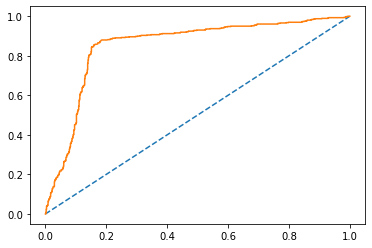

In [29]:
# predict probabilities
probs = model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);